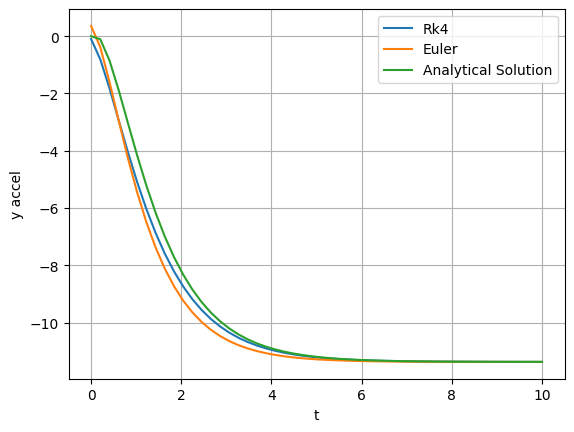

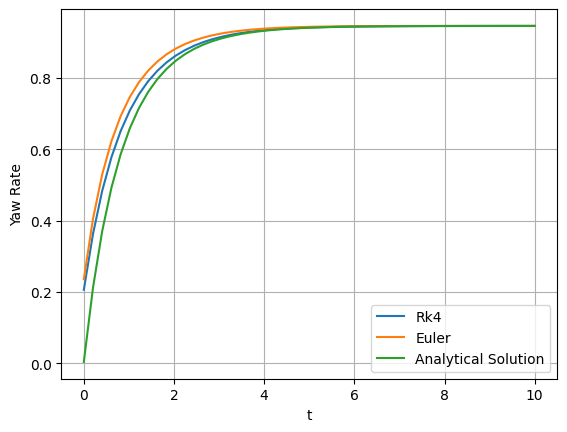

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

class BicycleSolver:
    def __init__(self, m, a, b, C_alpha_f, C_alpha_r, I_z, u):
        self.A = np.array(
            [[-1 * (C_alpha_f + C_alpha_r) / (m * u), (-1 * (a * C_alpha_f - b * C_alpha_r) / (m * u)) - u],
            [-1 * (a * C_alpha_f - b * C_alpha_r) / (I_z * u), -1 * (a**2 * C_alpha_f + b**2 * C_alpha_r) / (I_z * u)]]
        )

        self.B = np.array(
            [[C_alpha_f / m],
            [a*C_alpha_f / I_z]]
        )
    
    def solve(self, iterator, func, init_vector: np.ndarray, init_t, max_iter: int, step_size: float):
        """
        Generalized iterative solver that solves Y' = func using the specified iteration method.
        """
        y = init_vector.copy()
        res = []
        t = init_t
        for i in range(max_iter):
            y = iterator(func, y, t, step_size)
            t += step_size
            res.append(y)
        
        return y, res
    
    @staticmethod
    def eulers_method(func, y_curr: np.ndarray, t, step_size: float) -> np.ndarray:
        """
        Euler's Method for n-dimensional systems.
        
        Args:
            func: F(Y, t). (n, 1) output shape
            y_curr: Y_i. (n, 1) shaped
            step_size: delta t. Scalar

        Returns:
            y_next: Y_i+1. (n, 1) shaped
        """
        y_next = y_curr + step_size * func(y_curr, t)

        return y_next

    @staticmethod
    def rk4(func, y_curr: np.ndarray, t, step_size: float) -> np.ndarray:
        k1: np.ndarray = func(y_curr, t)

        v2: np.ndarray = y_curr + step_size / 2 * k1
        k2: np.ndarray = func(v2, t + step_size / 2)

        v3: np.ndarray = y_curr + step_size / 2 * k2
        k3: np.ndarray = func(v3, t + step_size / 2)

        v4: np.ndarray = y_curr + step_size * k3
        k4: np.ndarray = func(v4, t + step_size)

        return y_curr + step_size / 6 * (k1 + 2*k2 + 2*k3 + k4)
    
    @staticmethod
    def bicycle_model(A, B, y, delta) ->np.ndarray:
        return np.matmul(A, y) + B*delta
    
    @staticmethod
    def target(t):
        """
        Helper Function to test solver. Taken from the project manual, this computes the solution for time t
        using init [0,0] and table parameters.
        """
        return np.array(
            [[-13.0964*np.e**(-1 * 1.9745 * t) + 24.468*np.e**(-1*0.9839*t) - 11.3720],
            [-0.2496*np.e**(-1 * 1.9745 * t) - 0.69262*np.e**(-1*0.9839*t) + 0.9457]]
        )
    
    def visualize_results(self, histories, labels, init_t, t_final, max_iter, title1="", title2 = ""):
        plt.close('all')
        plt.figure()
        for i, hist in enumerate(histories):
            t_values = np.linspace(init_t, t_final, max_iter)
            plt.plot(t_values, [val[0] for val in hist], label=labels[i])

        # Y accel
        plt.xlabel('t')
        plt.ylabel("y accel")
        plt.legend()
        plt.grid()
        plt.title(title1)
        plt.show()

        plt.figure()

        # Yaw Rate
        for i, hist in enumerate(histories):
            t_values = np.linspace(init_t, t_final, max_iter)
            plt.plot(t_values, [val[1] for val in hist], label=labels[i])

        plt.xlabel('t')
        plt.ylabel("Yaw Rate")
        plt.legend()
        plt.grid()
        plt.title(title2)
        plt.show()
    
    def plot_ground_coordinates(self, histories):
        # TODO: Figure out how to do this
        # Looks like its integrating the X*, Y* and state vectors over time tho
        # Pretty annoying
        pass


def const_delta(t):
    return 0.1

init_vector = np.array([[0],[0]])
t_final = 10
init_t = 0
step_size = 0.2
max_iter = int(t_final / step_size)

solver = BicycleSolver(
    m = 1400,
    a = 1.14,
    b = 1.33,
    C_alpha_f = 25000,
    C_alpha_r = 21000,
    I_z = 2420,
    u = 75 * 1000 / 3600
)

def task_a_model(y, t) -> np.ndarray:
    return solver.bicycle_model(solver.A, solver.B, y, const_delta(t))

res, hist = solver.solve(solver.rk4, task_a_model, init_vector, init_t, max_iter, step_size)
res_2, hist_2 = solver.solve(solver.eulers_method, task_a_model, init_vector, init_t, max_iter, step_size)
target_hist = [solver.target(t) for t in np.linspace(init_t, t_final, max_iter)]

solver.visualize_results([hist, hist_2, target_hist], ["Rk4", "Euler", "Analytical Solution"], init_t, t_final, max_iter)

[[-68.19224579]
 [  3.71681698]]
[[-32.76173402]
 [  1.93578204]]
[[-20.09590547]
 [  1.33137045]]
[[-14.43996392]
 [  1.07590302]]
[[-11.37070035]
 [  0.94568334]]
[[-9.45073025]
 [ 0.8699638 ]]
[[-8.12788602]
 [ 0.8219993 ]]


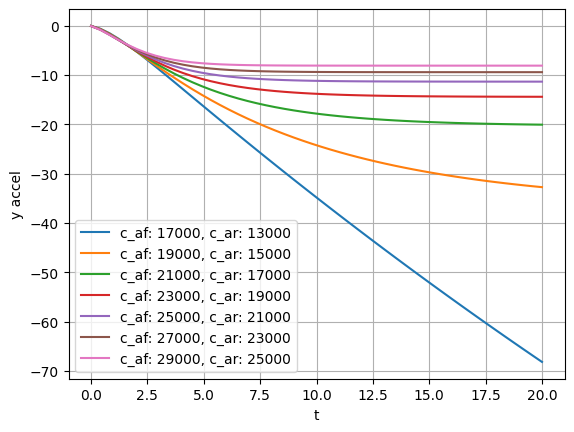

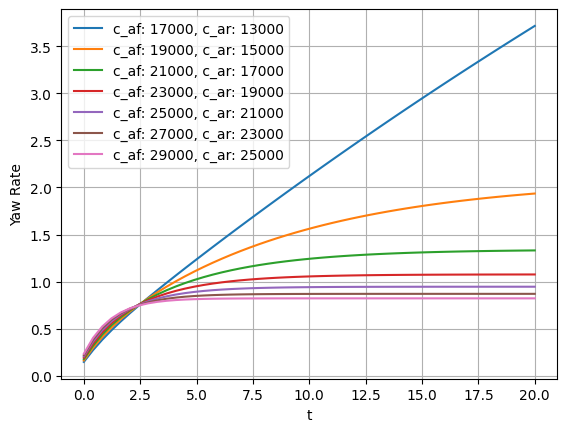

In [64]:
import numpy as np
modified_C_a_f = [17000, 19000, 21000, 23000, 25000, 27000, 29000]
modified_C_a_r = [13000, 15000, 17000, 19000, 21000, 23000, 25000]

"""
1. test both increase
2. test one increase at a time
3. maybe explicitly verify what happens if the cornering rear stiffness is greater than the front
"""

t_final = 20
init_t = 0
step_size = 0.2
histories = []
labels = []

for i in range(len(modified_C_a_f)):
    solver = BicycleSolver(

        m = 1400,
        a = 1.14,
        b = 1.33,
        C_alpha_f = modified_C_a_f[i],
        C_alpha_r = modified_C_a_r[i],
        I_z = 2420,
        u = 75 * 1000 / 3600
    )

    res, hist = solver.solve(solver.rk4, task_a_model, init_vector, init_t, max_iter, step_size)

    histories.append(hist)
    print(hist[-1])

    labels.append(f'c_af: {modified_C_a_f[i]}, c_ar: {modified_C_a_r[i]}')

solver.visualize_results(histories, labels, init_t, t_final, max_iter)

[[-7.55332657]
 [ 0.81155836]]
[[-11.45932477]
 [  1.34672305]]
[[-16.95128987]
 [  2.18569102]]
[[-24.44793812]
 [  3.44399342]]


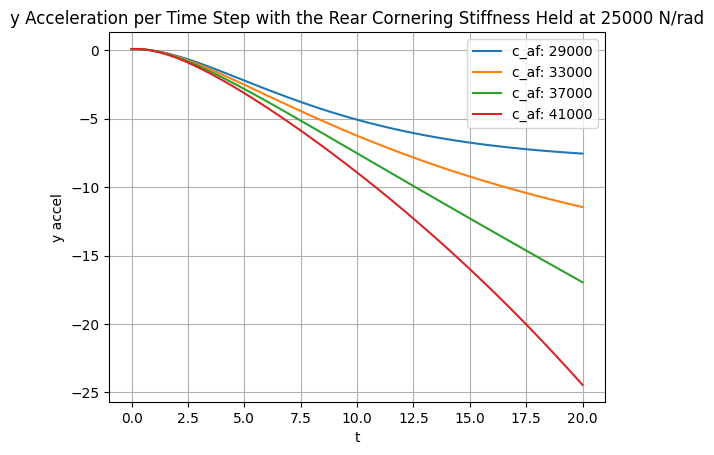

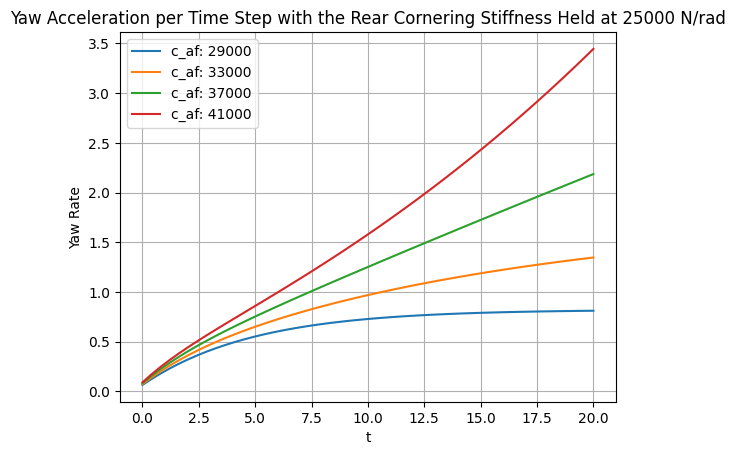

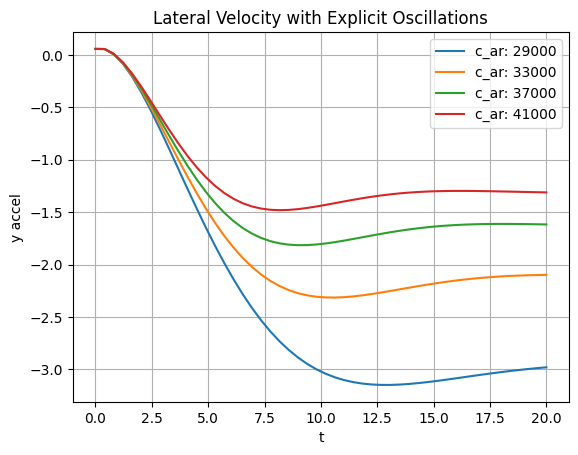

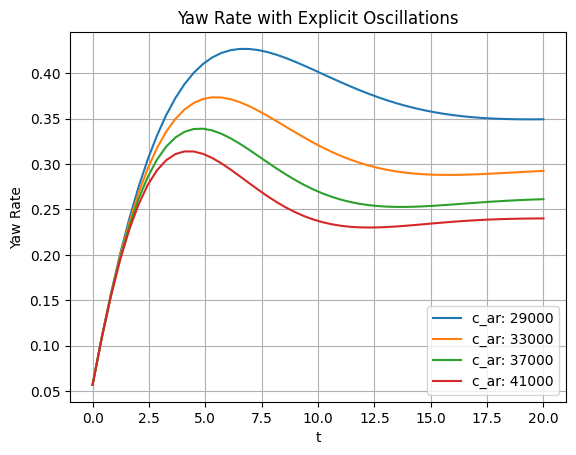

In [76]:
import numpy as np
modified_C_a = [29000, 33000, 37000, 41000]

"""
1. test both increase
2. test one increase at a time
3. maybe explicitly verify what happens if the cornering rear stiffness is greater than the front
"""

t_final = 20
init_t = 0
step_size = 0.05
histories = []
labels = []

for i in range(len(modified_C_a)):
    solver = BicycleSolver(

        m = 1400,
        a = 1.14,
        b = 1.33,
        C_alpha_f = modified_C_a[i],
        C_alpha_r = 25000,
        I_z = 2420,
        u = 75 * 1000 / 3600
    )

    res, hist = solver.solve(solver.rk4, task_a_model, init_vector, init_t, max_iter, step_size)
    print(hist[-1])

    histories.append(hist)
    labels.append(f'c_af: {modified_C_a[i]}')

solver.visualize_results(histories, labels, init_t, t_final, max_iter, "y Acceleration per Time Step with the Rear Cornering Stiffness Held at 25000 N/rad", "Yaw Acceleration per Time Step with the Rear Cornering Stiffness Held at 25000 N/rad")
histories = []
labels = []
for i in range(len(modified_C_a)):
    solver = BicycleSolver(

        m = 1400,
        a = 1.14,
        b = 1.33,
        C_alpha_f = 25000,
        C_alpha_r = modified_C_a[i],
        I_z = 2420,
        u = 75 * 1000 / 3600
    )

    res, hist = solver.solve(solver.rk4, task_a_model, init_vector, init_t, max_iter, step_size)
    histories.append(hist)
    labels.append(f'c_ar: {modified_C_a[i]}')

solver.visualize_results(histories, labels, init_t, t_final, max_iter, "Lateral Velocity with Explicit Oscillations", "Yaw Rate with Explicit Oscillations")

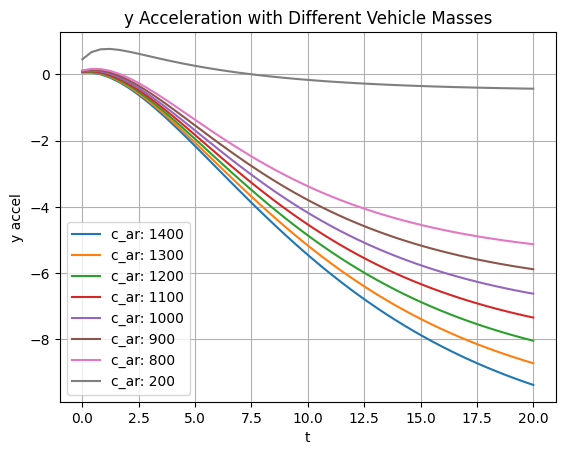

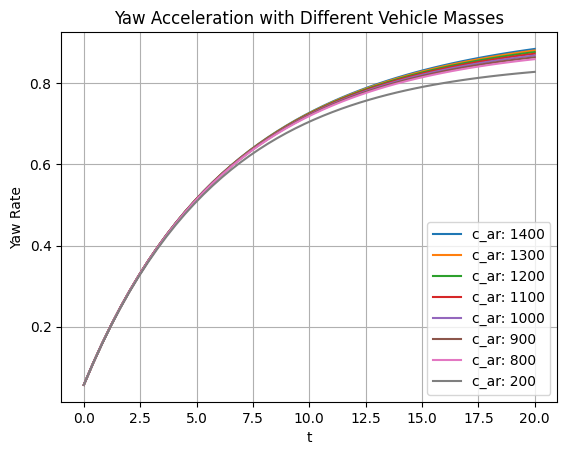

In [66]:
import numpy as np
modified_m = [1400, 1300, 1200, 1100, 1000, 900, 800, 200]

"""
1. test both increase
2. test one increase at a time
3. maybe explicitly verify what happens if the cornering rear stiffness is greater than the front
"""

t_final = 20
init_t = 0
step_size = 0.05
histories = []
labels = []

for i in range(len(modified_m)):
    solver = BicycleSolver(

        m = modified_m[i],
        a = 1.14,
        b = 1.33,
        C_alpha_f = 25000,
        C_alpha_r = 21000,
        I_z = 2420,
        u = 75 * 1000 / 3600
    )

    res, hist = solver.solve(solver.rk4, task_a_model, init_vector, init_t, max_iter, step_size)
    histories.append(hist)
    labels.append(f'c_ar: {modified_m[i]}')

solver.visualize_results(histories, labels, init_t, t_final, max_iter, "y Acceleration with Different Vehicle Masses", "Yaw Acceleration with Different Vehicle Masses")

In [ ]:
import numpy as np
from scipy.optimize import fsolve
def compute_d(C_alpha_f, car, m, u):
    return -1 * (C_alpha_f + car) / (m * u)

def compute_e(a, C_alpha_f, b, car, m, u):
    return (-1 * (a * C_alpha_f - b * car) / (m * u)) - u

def compute_f(a, C_alpha_f, b, car, k, u):
    return -1 * (a * C_alpha_f - b * car) / (k * u)

def compute_g(a, C_alpha_f, b, car, k, u):
    return -1 * (a**2 * C_alpha_f + b**2 * car) / (k * u)

def find_discriminant_0(vars, C_alpha_f, m, u, a, b, k):
    """
    am i stupid
    """
    C_alpha_r = vars[0] 

    d = compute_d(C_alpha_f, C_alpha_r, m, u)
    e = compute_e(a, C_alpha_f, b, C_alpha_r, m, u)
    f = compute_f(a, C_alpha_f, b, C_alpha_r, k, u)
    g = compute_g(a, C_alpha_f, b, C_alpha_r, k, u)

    lhs = (d + g)**2
    rhs = 4 * (d * g - e*f)
    # solve for discriminant = 0
    return lhs - rhs

# Function to find the root (value of y)
def find_y(func, caf, m, u, a, b, k):
    initial_guess = [25000]
    car = fsolve(func, initial_guess, args=(caf, m, u, a, b, k))
    
    return car



# Example usage
caf = 25000  # Example value for front cornering stiffness (caf)
m = 1400  # Example value for mass (m)
u = 75/3.6  # Example value for velocity (u)
a = 1.14
b = 1.33
k = 2420
print(k * u)
print(m*u)
discrim_0_car = find_y(find_discriminant_0, caf, m, u, a, b, k)
print("Solution for discrim 0:", discrim_0_car[0])

def find_discriminant_0(var, u_var, k_vars):
    """
    Generalized function to solve for any unknown variable.
    :list var: List containing the unknown variable.
    :string unknown_var: The variable to solve for.
    :dict k_vars: Dictionary of known variables.
    """
    # Update the known variables dictionary with the unknown one
    k_vars[u_var] = var[0]

    d = compute_d(k_vars["C_alpha_f"], k_vars["C_alpha_r"], k_vars["m"], k_vars["u"])
    e = compute_e(k_vars["a"], k_vars["C_alpha_f"], k_vars["b"], k_vars["C_alpha_r"], k_vars["m"], k_vars["u"])
    f = compute_f(k_vars["a"], k_vars["C_alpha_f"], k_vars["b"], k_vars["C_alpha_r"], k_vars["k"], k_vars["u"])
    g = compute_g(k_vars["a"], k_vars["C_alpha_f"], k_vars["b"], k_vars["C_alpha_r"], k_vars["k"], k_vars["u"])

    lhs = (d + g) ** 2
    rhs = 4 * (d * g - e * f)
    
    return lhs - rhs


def find_unknown(func, unknown_var, known_vars, initial_guess=25000):

    solution = fsolve(func, [initial_guess], args=(unknown_var, known_vars))
    return solution[0]

# Example usage:
known_values = {
    "C_alpha_f": 25000,
    # "C_alpha_r": unknown (we want to solve for this)
    "m": 1400,
    "u": 75/3.6,
    "a": 1.14,
    "b": 1.33,
    "k": 2420
}

unknown_variable = "C_alpha_r"
resultdisc = find_unknown(find_discriminant_0, unknown_variable, known_values)
print(f"Solved {unknown_variable}: {resultdisc}")


50416.666666666664
29166.666666666664
Solution for discrim 0: 21445.968375009976


Solved C_alpha_r: 21445.968375009976


 FINDING WHEN THE EIGENVALUES BECOME POSITIVE WITH CONSTANT CAF


In [69]:
def find_det_0(var, u_var, k_vars):
    """
    Generalized function to solve for any unknown variable.
    :list var: List containing the unknown variable.
    :string unknown_var: The variable to solve for.
    :dict k_vars: Dictionary of known variables.
    """
    # Update the known variables dictionary with the unknown one
    k_vars[u_var] = var[0]

    d = compute_d(k_vars["C_alpha_f"], k_vars["C_alpha_r"], k_vars["m"], k_vars["u"])
    e = compute_e(k_vars["a"], k_vars["C_alpha_f"], k_vars["b"], k_vars["C_alpha_r"], k_vars["m"], k_vars["u"])
    f = compute_f(k_vars["a"], k_vars["C_alpha_f"], k_vars["b"], k_vars["C_alpha_r"], k_vars["k"], k_vars["u"])
    g = compute_g(k_vars["a"], k_vars["C_alpha_f"], k_vars["b"], k_vars["C_alpha_r"], k_vars["k"], k_vars["u"])

    lhs = (d*g)
    rhs = (e*f)
    
    # solve for discriminant = 0
    return lhs - rhs

resultdet = find_unknown(find_det_0, unknown_variable, known_values)
print("Solution for discrim 0:", resultdet)

Solution for discrim 0: 18026.469037050058


[[-20.6803808 ]
 [  2.09098467]]
[[-11.90528509]
 [  1.13504671]]
[[-2.37259107]
 [ 0.30980495]]


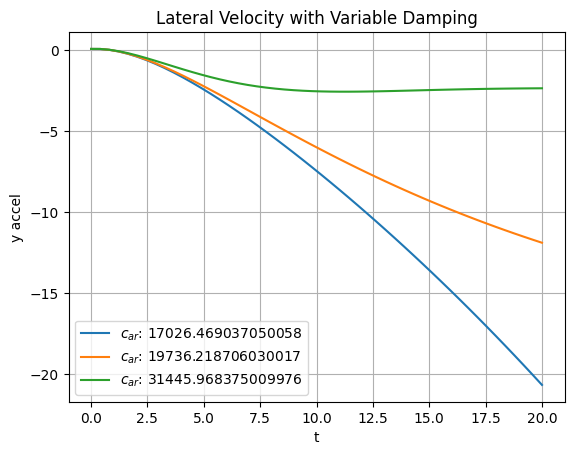

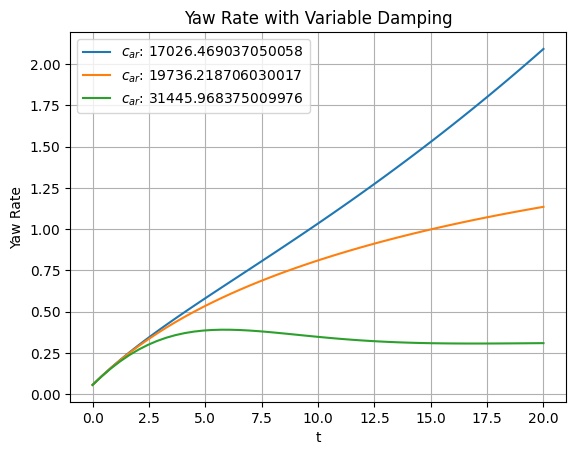

In [70]:
import numpy as np
modified_C_a = [resultdet - 1000, (resultdet + resultdisc) / 2, resultdisc + 10000]

"""
1. test both increase
2. test one increase at a time
3. maybe explicitly verify what happens if the cornering rear stiffness is greater than the front
"""

t_final = 20
init_t = 0
step_size = 0.05
histories = []
labels = []

for i in range(len(modified_C_a)):
    solver = BicycleSolver(

        m = 1400,
        a = 1.14,
        b = 1.33,
        C_alpha_f = 25000,
        C_alpha_r = modified_C_a[i],
        I_z = 2420,
        u = 75 * 1000 / 3600
    )

    res, hist = solver.solve(solver.rk4, task_a_model, init_vector, init_t, max_iter, step_size)
    print(hist[-1])

    histories.append(hist)
    labels.append(f'$c_{{ar}}$: {modified_C_a[i]}')

solver.visualize_results(histories, labels, init_t, t_final, max_iter, "Lateral Velocity with Variable Damping" , "Yaw Rate with Variable Damping")

In [71]:
caf_arr = np.linspace(17000, 30000, 10)
car = 21000

for caf in caf_arr:
    solver = BicycleSolver(
        m = 1400,
        a = 1.14,
        b = 1.33,
        C_alpha_f = caf,
        C_alpha_r = car,
        I_z = 2420,
        u = 75 * 1000 / 3600
    )
    eigen = np.linalg.eig(solver.A)
    print(f'{caf} has eigen values: {eigen.eigenvalues}')

17000.0 has eigen values: [-1.2389337+1.86527705j -1.2389337-1.86527705j]
18444.444444444445 has eigen values: [-1.28231246+1.67788532j -1.28231246-1.67788532j]
19888.88888888889 has eigen values: [-1.32569122+1.46546115j -1.32569122-1.46546115j]
21333.333333333332 has eigen values: [-1.36906999+1.21494451j -1.36906999-1.21494451j]
22777.777777777777 has eigen values: [-1.41244875+0.89489693j -1.41244875-0.89489693j]
24222.222222222223 has eigen values: [-1.45582752+0.34903786j -1.45582752-0.34903786j]
25666.666666666664 has eigen values: [-2.24817162 -0.75024094]
27111.11111111111 has eigen values: [-2.65949553 -0.42567456]
28555.555555555555 has eigen values: [-2.97800994 -0.19391768]
30000.0 has eigen values: [-3.25164317 -0.00704197]


C:\Users\mckal\AppData\Local\Temp\ipykernel_28496\1313165721.py:29: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('cool')
C:\Users\mckal\AppData\Local\Temp\ipykernel_28496\1313165721.py:60: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


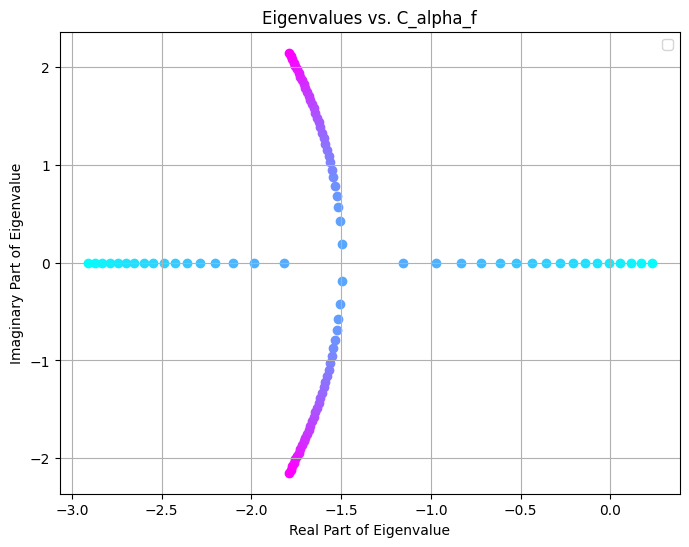

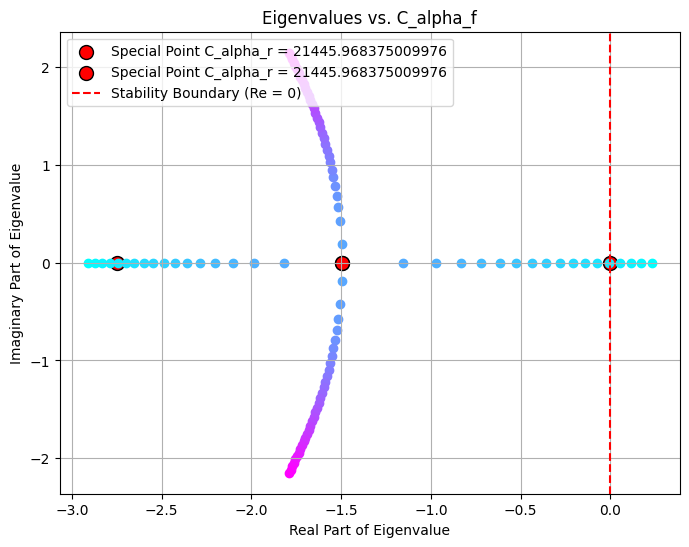

In [74]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm

# Define the function to plot eigenvalues for varying C_alpha_f
def plot_eigenvalues_vs_caf(BicycleSolver, car=21000, b=False):
    caf_arr = np.linspace(17000, 30000, 50)
    if b:
        caf_arr = np.concatenate((caf_arr, [resultdisc, resultdet]))
    
    # Store eigenvalues for each C_alpha_f
    all_eigenvalues = []
    
    for caf in caf_arr:
        solver = BicycleSolver(
            m=1400,
            a=1.14,
            b=1.33,
            C_alpha_f=25000,
            C_alpha_r=caf,
            I_z=2420,
            u=75 * 1000 / 3600
        )
        eigenvalues = np.linalg.eig(solver.A).eigenvalues
        all_eigenvalues.append(eigenvalues)
    
    # Set up colormap from red to blue
    cmap = cm.get_cmap('cool')
    norm = mcolors.Normalize(vmin=min(caf_arr), vmax=max(caf_arr))
    
    # Plot setup
    plt.figure(figsize=(8, 6))
    
    
    if (b == False):
        for i, caf in enumerate(caf_arr):
            color = cmap(norm(caf))
            for ev in all_eigenvalues[i]:
                plt.scatter(ev.real, ev.imag, color=color)

# Plot the special extra point in a distinct color (e.g., red or hot)
    else:
        special_color = "red"
        for ev in all_eigenvalues[-2:]:
            plt.scatter(ev.real, ev.imag, color=special_color, edgecolors='black', s=100, label=f'Special Point C_alpha_r = {resultdisc}')

        # Plot each C_alpha_f's eigenvalues with color gradient
        for i, caf in enumerate(caf_arr[:-2]):
            color = cmap(norm(caf))
            for ev in all_eigenvalues[i]:
                plt.scatter(ev.real, ev.imag, color=color)

# Plot the special extra point in a distinct color (e.g., red or hot)

        plt.axvline(0, color='red', linestyle='--', label='Stability Boundary (Re = 0)')
    plt.xlabel('Real Part of Eigenvalue')
    plt.ylabel('Imaginary Part of Eigenvalue')
    plt.title('Eigenvalues vs. C_alpha_f')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_eigenvalues_vs_caf(BicycleSolver)
plot_eigenvalues_vs_caf(BicycleSolver, b=True)
